In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
data = pd.read_csv('../ggg/gamesales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
Rank            16324 non-null int64
Name            16324 non-null object
Platform        16324 non-null object
Year            16324 non-null int64
Genre           16324 non-null object
Publisher       16288 non-null object
NA_Sales        16324 non-null float64
EU_Sales        16324 non-null float64
JP_Sales        16324 non-null float64
Other_Sales     16324 non-null float64
Global_Sales    16324 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [34]:
data.dropna(how = 'any', inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16288 entries, 0 to 16323
Data columns (total 11 columns):
Rank            16288 non-null int64
Name            16288 non-null object
Platform        16288 non-null object
Year            16288 non-null int64
Genre           16288 non-null object
Publisher       16288 non-null object
NA_Sales        16288 non-null float64
EU_Sales        16288 non-null float64
JP_Sales        16288 non-null float64
Other_Sales     16288 non-null float64
Global_Sales    16288 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [36]:
data.Year = data.Year.astype(int)

In [37]:
from collections import Counter

In [38]:
#Counting most common platforms 
platform_count = Counter(data.Platform)
most_platform  = platform_count.most_common(20)
platform_name, count = zip(*most_platform)
platform_name, count = list(platform_name), list(count)

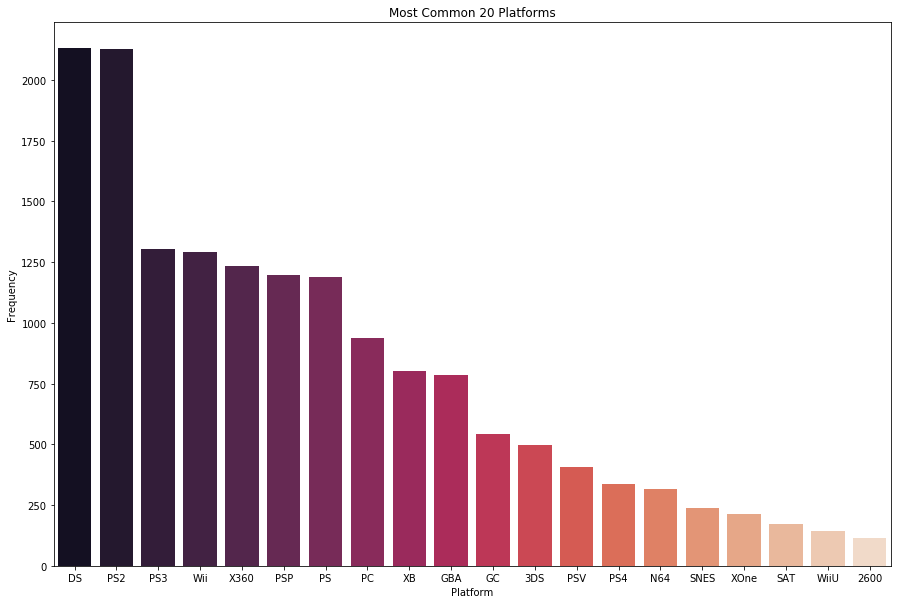

In [39]:
#Bar Plot Visualization
plt.figure(figsize=(15,10))
ax=sns.barplot(x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most Common 20 Platforms')
plt.show()

In [43]:
years = [1990, 2000, 2010]
total_sales_group = data.groupby(['Year']).sum().drop(years)
average_sales_group = data.groupby(['Year']).mean().drop(years)
count_sales_group = data.replace(0, np.nan).groupby(['Year']).count().drop(years)

In [44]:
def lineplot(df, title = 'Sales by Year', ylabel ='Sales' , legendsize = 10, legendloc = 'upper left'):

    year = df.index.values
    na = df.NA_Sales
    eu = df.EU_Sales
    jp = df.JP_Sales
    other = df.Other_Sales
    global_ = df.Global_Sales
    
    if df is count_sales_group:
        region_list = [na, eu, jp, other]
        columns = ['NA', 'EU', 'JP', 'OTHER']
    else:
        region_list = [na, eu, jp, other, global_]
        columns = ['NA', 'EU', 'JP', 'OTHER', 'WORLD WIDE']

    for i, region in enumerate(region_list):
        plt.plot(year, region, label = columns[i])

    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.title(title)
    plt.legend(loc=legendloc, prop = {'size':legendsize})
    plt.show()
    plt.clf()

    for i, region in enumerate(region_list):
        plt.plot(year, region, label = columns[i])

    plt.yscale('log')
    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.title(title + '(Log)')
    plt.legend(loc=legendloc, prop = {'size':legendsize})
    plt.show()
    plt.clf()

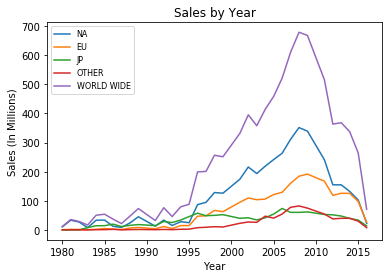

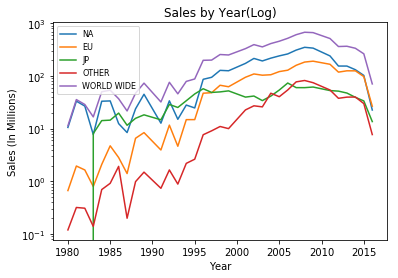

<Figure size 432x288 with 0 Axes>

In [45]:
lineplot(total_sales_group, title = 'Sales by Year', ylabel ='Sales (In Millions)', legendsize = 8)

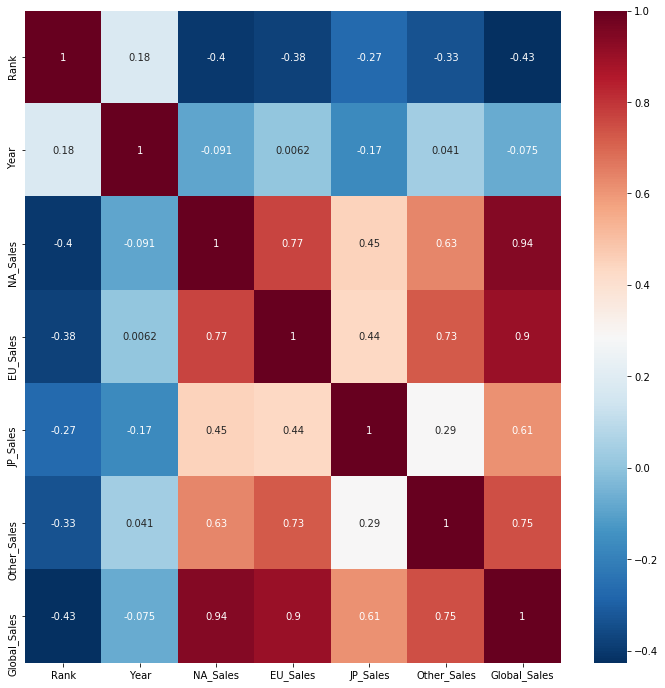

In [46]:
#Correlation between each feature
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='RdBu_r')

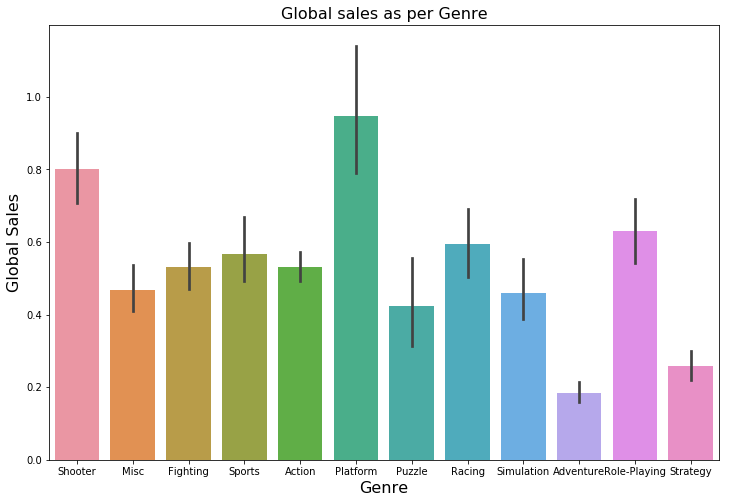

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x='Genre',y='Global_Sales',data=data)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Global Sales',fontsize=16)
plt.title('Global sales as per Genre',fontsize=16)
plt.show()